## CIFAR-10 컬러 이미지 분류: DNN vs CNN

이 노트북은 CIFAR-10 컬러 이미지 데이터셋을 사용하여 두 가지 다른 종류의 신경망 모델을 구축하고 성능을 비교합니다.

1. **완전 연결 신경망 (DNN)**: 이미지를 1차원 벡터로 펼쳐서 학습하는 기본적인 딥러닝 모델입니다.
2. **합성곱 신경망 (CNN)**: 이미지의 공간적 특징을 효과적으로 학습하기 위해 설계된 모델입니다.

두 모델의 성능 차이를 통해 CNN이 이미지 처리에 왜 더 강력한지 확인합니다.

### 1. 라이브러리 임포트 및 데이터 로드
필요한 라이브러리를 임포트하고 Keras에 내장된 CIFAR-10 데이터셋을 로드합니다.

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import models, layers
import matplotlib.pyplot as plt

# 데이터 로드
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = cifar10.load_data()

print("--- Original Data Shapes ---")
print("X_train shape:", X_train_orig.shape)
print("y_train shape:", y_train_orig.shape)
print("X_test shape:", X_test_orig.shape)
print("y_test shape:", y_test_orig.shape)
print("Number of unique labels:", len(np.unique(y_train_orig)))


170498071/170498071 [==============================] - 16s 0us/step
--- Original Data Shapes ---
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Number of unique labels: 10


### 2. 데이터 탐색 및 시각화
데이터셋에 포함된 이미지가 어떤 모습인지 확인하기 위해 몇 개의 이미지를 시각화합니다.

Showing a single image:


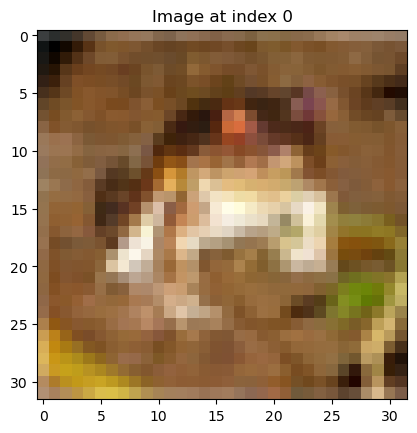


Showing a grid of images:


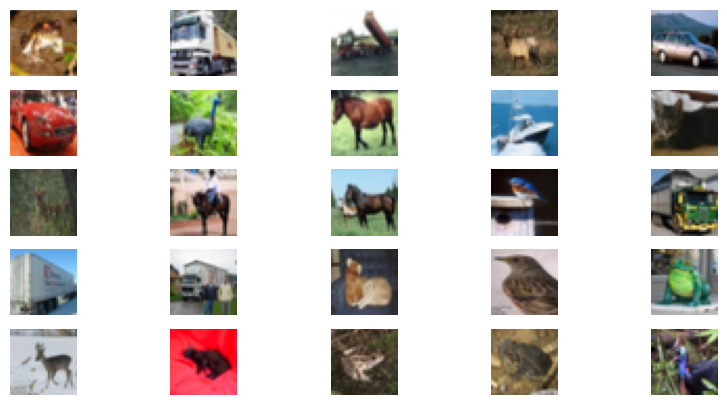

In [2]:
def imageShow(images, index):
    """지정된 인덱스의 이미지를 하나 보여줍니다."""
    plt.imshow(images[index], cmap=plt.cm.binary)
    plt.title(f"Image at index {index}")
    plt.show()

def imageShowGrid(images, rows, cols):
    """이미지를 그리드 형태로 여러 개 보여줍니다."""
    plt.figure(figsize=(10, 5))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.axis('off')
    plt.show()

# 단일 이미지 출력
print("Showing a single image:")
imageShow(X_train_orig, 0)

# 여러 이미지 출력
print("\nShowing a grid of images:")
imageShowGrid(X_train_orig, 5, 5)

### 3. 모델 1: 완전 연결 신경망 (DNN)
첫 번째로, 이미지를 1차원 배열로 펼친 후 완전 연결층(Dense layer)으로만 구성된 모델을 만들어 학습시킵니다.

#### 3.1 DNN을 위한 데이터 전처리
- **Reshape**: 3차원 이미지 데이터(32x32x3)를 1차원 벡터(3072)로 변환합니다.
- **Scaling**: 픽셀 값을 0-1 범위로 정규화합니다.
- **One-Hot Encoding**: 정수 형태의 레이블을 원-핫 벡터로 변환합니다.

In [3]:
# DNN용 데이터 복사 및 전처리
X_train_dnn = X_train_orig.reshape(50000, 32 * 32 * 3).astype('float32') / 255
X_test_dnn = X_test_orig.reshape(10000, 32 * 32 * 3).astype('float32') / 255

y_train_cat = to_categorical(y_train_orig)
y_test_cat = to_categorical(y_test_orig)

print("X_train_dnn shape:", X_train_dnn.shape)
print("y_train_cat shape:", y_train_cat.shape)

X_train_dnn shape: (50000, 3072)
y_train_cat shape: (50000, 10)


#### 3.2 DNN 모델 구성 및 학습

In [4]:
dnn_model = models.Sequential([
    layers.Input(shape=(32 * 32 * 3,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

dnn_model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

dnn_model.summary()

print("\nDNN 모델 학습 시작")
history_dnn = dnn_model.fit(X_train_dnn, y_train_cat, epochs=100, batch_size=100, validation_split=0.2, verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411146 (1.57 MB)
Trainable params: 411146 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

DNN 모델 학습 시작
Epoch 1/100


400/400 [==============================] - 2s 4ms/step - loss: 2.0072 - accuracy: 0.2837 - val_loss: 1.9104 - val_accuracy: 0.3136
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8375 - accuracy: 0.3498 - val_loss: 1.8086 - v

#### 3.3 DNN 모델 평가

In [5]:
print("\n--- DNN Model Evaluation ---")
train_loss, train_acc = dnn_model.evaluate(X_train_dnn, y_train_cat)
print(f"훈련셋 손실: {train_loss:.4f}, 정확도: {train_acc:.4f}")

test_loss, test_acc = dnn_model.evaluate(X_test_dnn, y_test_cat)
print(f"테스트셋 손실: {test_loss:.4f}, 정확도: {test_acc:.4f}")


--- DNN Model Evaluation ---
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0958 - accuracy: 0.6201
훈련셋 손실: 1.0958, 정확도: 0.6201
313/313 [==============================] - 1s 2ms/step - loss: 1.5034 - accuracy: 0.5005
테스트셋 손실: 1.5034, 정확도: 0.5005


### 4. 모델 2: 합성곱 신경망 (CNN)
두 번째로, 이미지의 2D 구조를 그대로 입력받아 처리하는 합성곱 신경망(CNN)을 구성하고 학습시킵니다.

**주요 레이어 설명:**
- **Conv2D**: 이미지의 특징을 추출하는 필터를 학습합니다.
- **MaxPooling2D**: 중요한 특징만 남기고 데이터 크기를 줄여 과대적합을 방지합니다.
- **Flatten**: CNN의 다차원 출력을 완전 연결망에 전달하기 위해 1차원 벡터로 변환합니다.
- **Dropout**: 훈련 중 일부 뉴런을 비활성화하여 과대적합을 방지합니다 (이 코드에서는 사용되지 않았지만 일반적인 기법).

#### 4.1 CNN을 위한 데이터 전처리
CNN은 3차원 이미지 데이터를 직접 입력으로 받으므로 Reshape 과정이 필요 없습니다. 스케일링과 원-핫 인코딩만 수행합니다.

In [6]:
# CNN용 데이터는 원본 형태를 유지하고 스케일링만 진행합니다.
# 레이블은 이미 원-핫 인코딩 되었습니다.
X_train_cnn = X_train_orig.astype('float32')
X_test_cnn = X_test_orig.astype('float32')

print("X_train_cnn shape:", X_train_cnn.shape)

X_train_cnn shape: (50000, 32, 32, 3)


#### 4.2 CNN 모델 구성 및 학습

In [7]:
cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255), # 입력 스케일링
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

print("\nCNN 모델 학습 시작")
# 에포크 수를 줄여서 실행 시간을 단축합니다 (원본: 140)
history_cnn = cnn_model.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=100, validation_data=(X_test_cnn, y_test_cat), verbose=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                

#### 4.3 CNN 모델 평가

In [8]:
print("\n--- CNN Model Evaluation ---")
train_loss, train_acc = cnn_model.evaluate(X_train_cnn, y_train_cat)
print(f"훈련셋 손실: {train_loss:.4f}, 정확도: {train_acc:.4f}")

test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)
print(f"테스트셋 손실: {test_loss:.4f}, 정확도: {test_acc:.4f}")


--- CNN Model Evaluation ---
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7799 - accuracy: 0.7243
훈련셋 손실: 0.7799, 정확도: 0.7243
313/313 [==============================] - 2s 5ms/step - loss: 1.0627 - accuracy: 0.6452
테스트셋 손실: 1.0627, 정확도: 0.6452


### 5. 결론
두 모델의 최종 테스트 정확도를 비교해보면, CNN 모델이 DNN 모델보다 훨씬 높은 성능을 보이는 것을 확인할 수 있습니다. 이는 CNN이 이미지의 공간적 계층 구조(spatial hierarchy)를 보존하고 지역적 패턴(local pattern)을 효과적으로 학습하기 때문입니다. 반면, DNN은 이미지를 1차원 벡터로 펼치는 과정에서 이러한 중요한 공간 정보가 손실됩니다.